In [2]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample, convolve

C:\Users\Allen Heartcore\AppData\Local\Temp\ipykernel_33560\1717822617.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 24000)  # used to be "sr / 2"


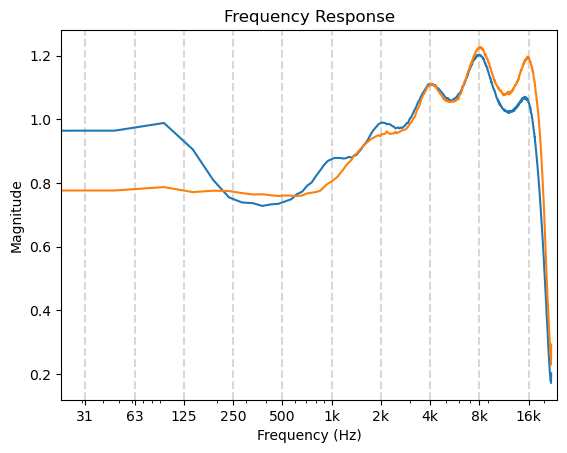

In [2]:
data, sr = sf.read('../data/processed/Spatial - Panorama.wav')
n = len(data)
if len(data.shape) == 1:
    data = data.reshape(-1, 1)

ticks = {
    31: '31', 63: '63', 125: '125', 250: '250', 500: '500',
    1000: '1k', 2000: '2k', 4000: '4k', 8000: '8k', 16000: '16k'
}

for freq in ticks.keys():
    plt.axvline(freq, color='#D8D8D8', linestyle='--')

for i in range(data.shape[1]):
    fft = np.abs(np.fft.fft(data[:, i]))
    freqs = np.fft.fftfreq(n, 1 / sr)
    plt.plot(freqs[:n//2], fft[:n//2])

plt.xscale('log')
plt.xlim(0, 24000)  # used to be "sr / 2"
plt.xticks(list(ticks.keys()), list(ticks.values()))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response')
plt.show()

In [17]:
def convolve_ir(clip, clip_sr, efx, efx_sr):

    out_sr = clip_sr

    if efx_sr != out_sr:
        efx = resample(efx, int(len(efx) * out_sr / efx_sr))

    if len(clip.shape) == 1:
        if len(efx.shape) == 1:
            out = convolve(clip, efx)
        else:
            out = np.array([convolve(clip, efx[:, i]) for i in range(efx.shape[1])]).T
    else:
        if len(efx.shape) == 1:
            out = np.array([convolve(clip[:, i], efx) for i in range(clip.shape[1])]).T
        else:
            assert clip.shape[1] == efx.shape[1]
            out = np.array([convolve(clip[:, i], efx[:, i]) for i in range(clip.shape[1])]).T

    out = out / np.max(np.abs(out))
    return out, out_sr

In [19]:
clip, clip_sr = sf.read('../data/hajime_48.flac')
efx, efx_sr = sf.read('../data/processed/Spatial - Panorama.wav')

out, out_sr = convolve_ir(clip, clip_sr, efx, efx_sr)
sf.write('../data/hajime_48_panorama.wav', out, out_sr)